### Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data exploration and visualization 

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

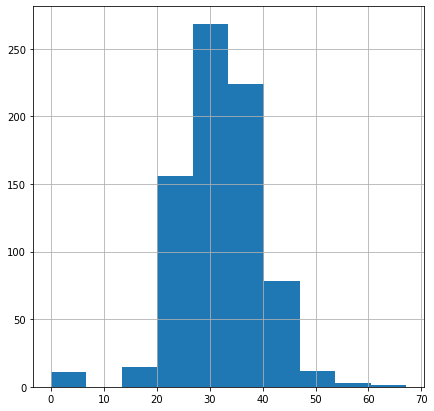

In [6]:
plt.figure(figsize=(7,7))
df.BMI.hist()
plt.show()

In [7]:
zero_bmi=df['BMI']==0
df[zero_bmi]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [8]:
#dropping rows with 0 bmi as it is less in count
df=df[~zero_bmi]

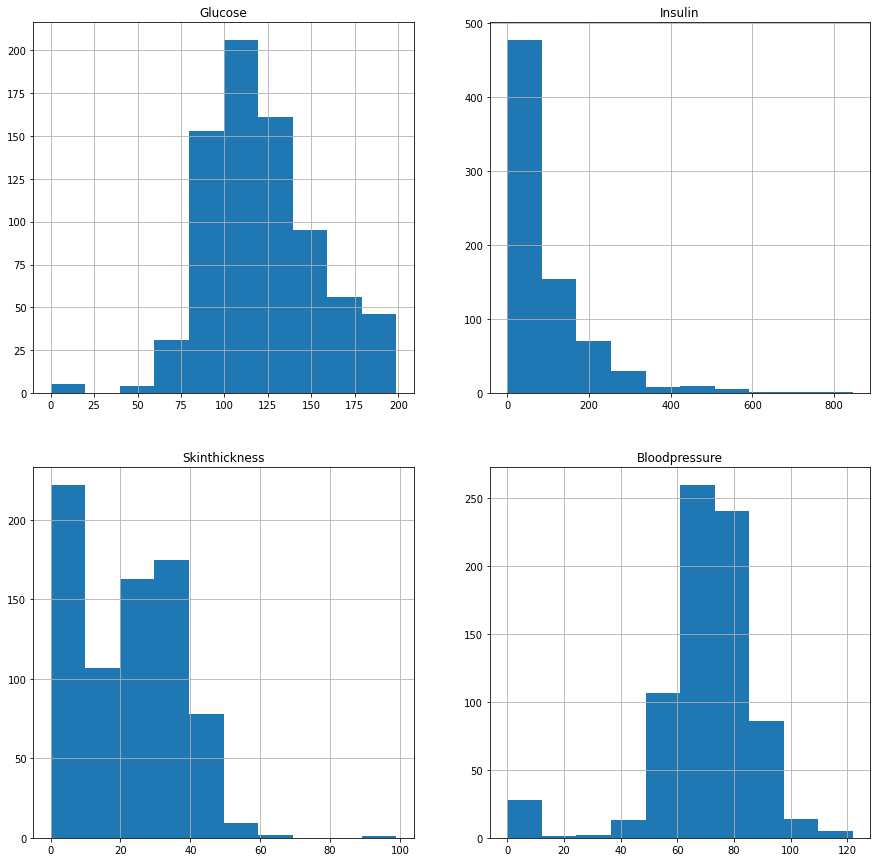

In [9]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Glucose')
df.Glucose.hist()

plt.subplot(2,2,2)
plt.title('Insulin')
df.Insulin.hist()

plt.subplot(2,2,3)
plt.title('Skinthickness')
df.SkinThickness.hist()

plt.subplot(2,2,4)
plt.title('Bloodpressure')
df.BloodPressure.hist()
plt.show()

### Data cleaning

Dropping zero bloodpressure and glucose records as they are less in count

In [10]:
zero_bp=df['BloodPressure']==0

In [11]:
df=df[~zero_bp]

In [12]:
zero_glucose=df.Glucose==0

In [13]:
df=df[~zero_glucose]

In [14]:
#filling the skinthickness 0 values with mean of the column

df['SkinThickness']=df.SkinThickness.apply(lambda x:int(df.SkinThickness.mean()) if x==0 else int(x))

In [15]:
df[df.Insulin==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,21,0,23.3,0.672,32,1
5,5,116,74,21,0,25.6,0.201,30,0
10,4,110,92,21,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,21,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,21,0,30.1,0.349,47,1


In [16]:
#replacing 0 values with mean

df['Insulin']=df.Insulin.apply(lambda x:int(df.Insulin.mean()) if x==0 else int(x))

In [82]:
#Saving the cleaned data into a new xlsx file for further use.
df.to_excel('cleaned_data.xlsx',index=False)

In [18]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
import warnings
warnings.filterwarnings('ignore')

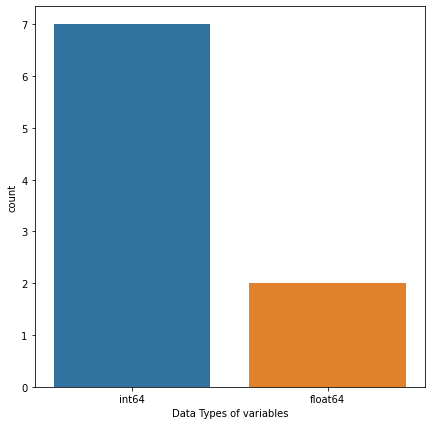

In [20]:
plt.figure(figsize=(7,7))
plt.xlabel('Data Types of variables')
sns.countplot(df.dtypes)
plt.show()

In [21]:
df.Outcome.value_counts()

0    475
1    249
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

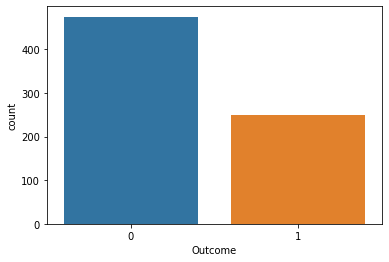

In [22]:
sns.countplot(x='Outcome',data=df)

In [23]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,84,33.6,0.627,50,1
1,1,85,66,29,84,26.6,0.351,31,0


In [24]:
len(df.Pregnancies)

724

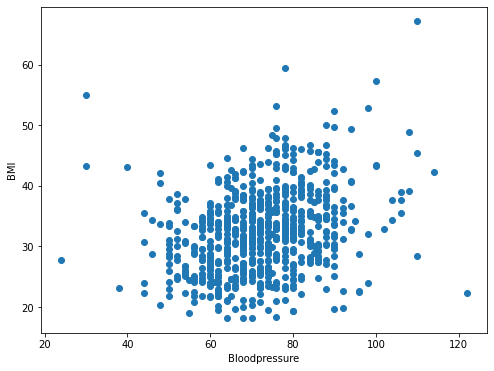

In [25]:
plt.figure(figsize=(8,6))
plt.xlabel('Bloodpressure')
plt.ylabel('BMI')
plt.scatter(x=df.BloodPressure,y=df.BMI)

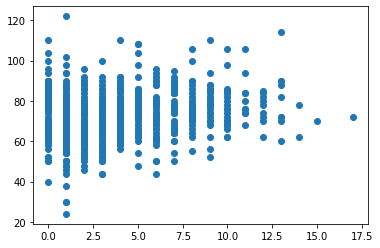

In [26]:
plt.scatter(x=df.Pregnancies,y=df.BloodPressure)
plt.show()

#No pattern can be seen between pregnencies and bloodpressure

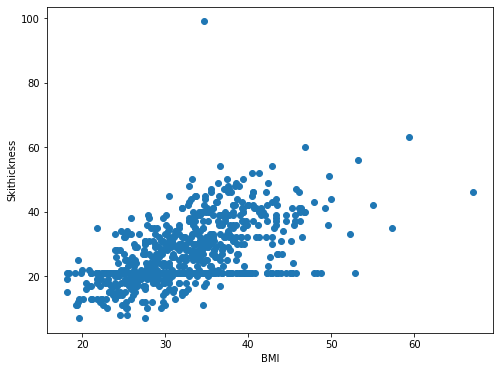

In [27]:
plt.figure(figsize=(8,6))
plt.ylabel('Skithickness')
plt.xlabel('BMI')
plt.scatter(x=df.BMI,y=df.SkinThickness)
plt.show()

We can see a positive correlation between Skinthickness and BMI

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,84,33.6,0.627,50,1
1,1,85,66,29,84,26.6,0.351,31,0
2,8,183,64,21,84,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


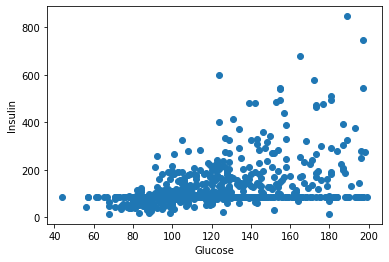

In [29]:
plt.scatter(x=df.Glucose,y=df.Insulin)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

Some Positive correlation is seen between Glucose and Insulin

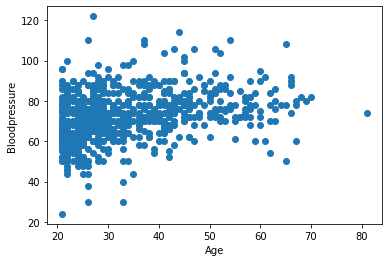

In [30]:
plt.scatter(x=df.Age,y=df.BloodPressure)
plt.xlabel('Age')
plt.ylabel('Bloodpressure')
plt.show()

Bloodpressure can be seen stable in all age groups

In [31]:
df_corr=df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.010168,-0.018163,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.164531,0.406764,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.134033,0.009613,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.010168,0.164531,0.134033,1.000000,0.224893,0.552490,0.150432,0.025951,0.186542
Insulin,-0.018163,0.406764,0.009613,0.224893,1.000000,0.194242,0.156170,0.040653,0.192629
BMI,0.012342,0.223276,0.287403,0.552490,0.194242,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.150432,0.156170,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.025951,0.040653,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.186542,0.192629,0.299375,0.184947,0.245741,1.000000


<AxesSubplot:>

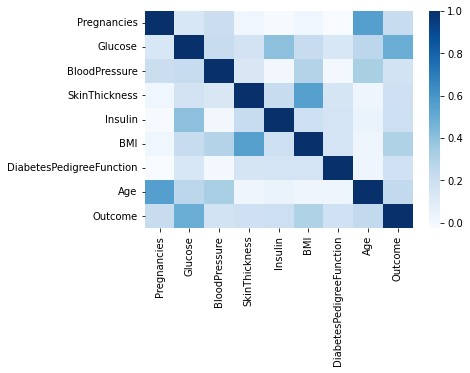

In [32]:
sns.heatmap(df_corr,cmap='Blues')

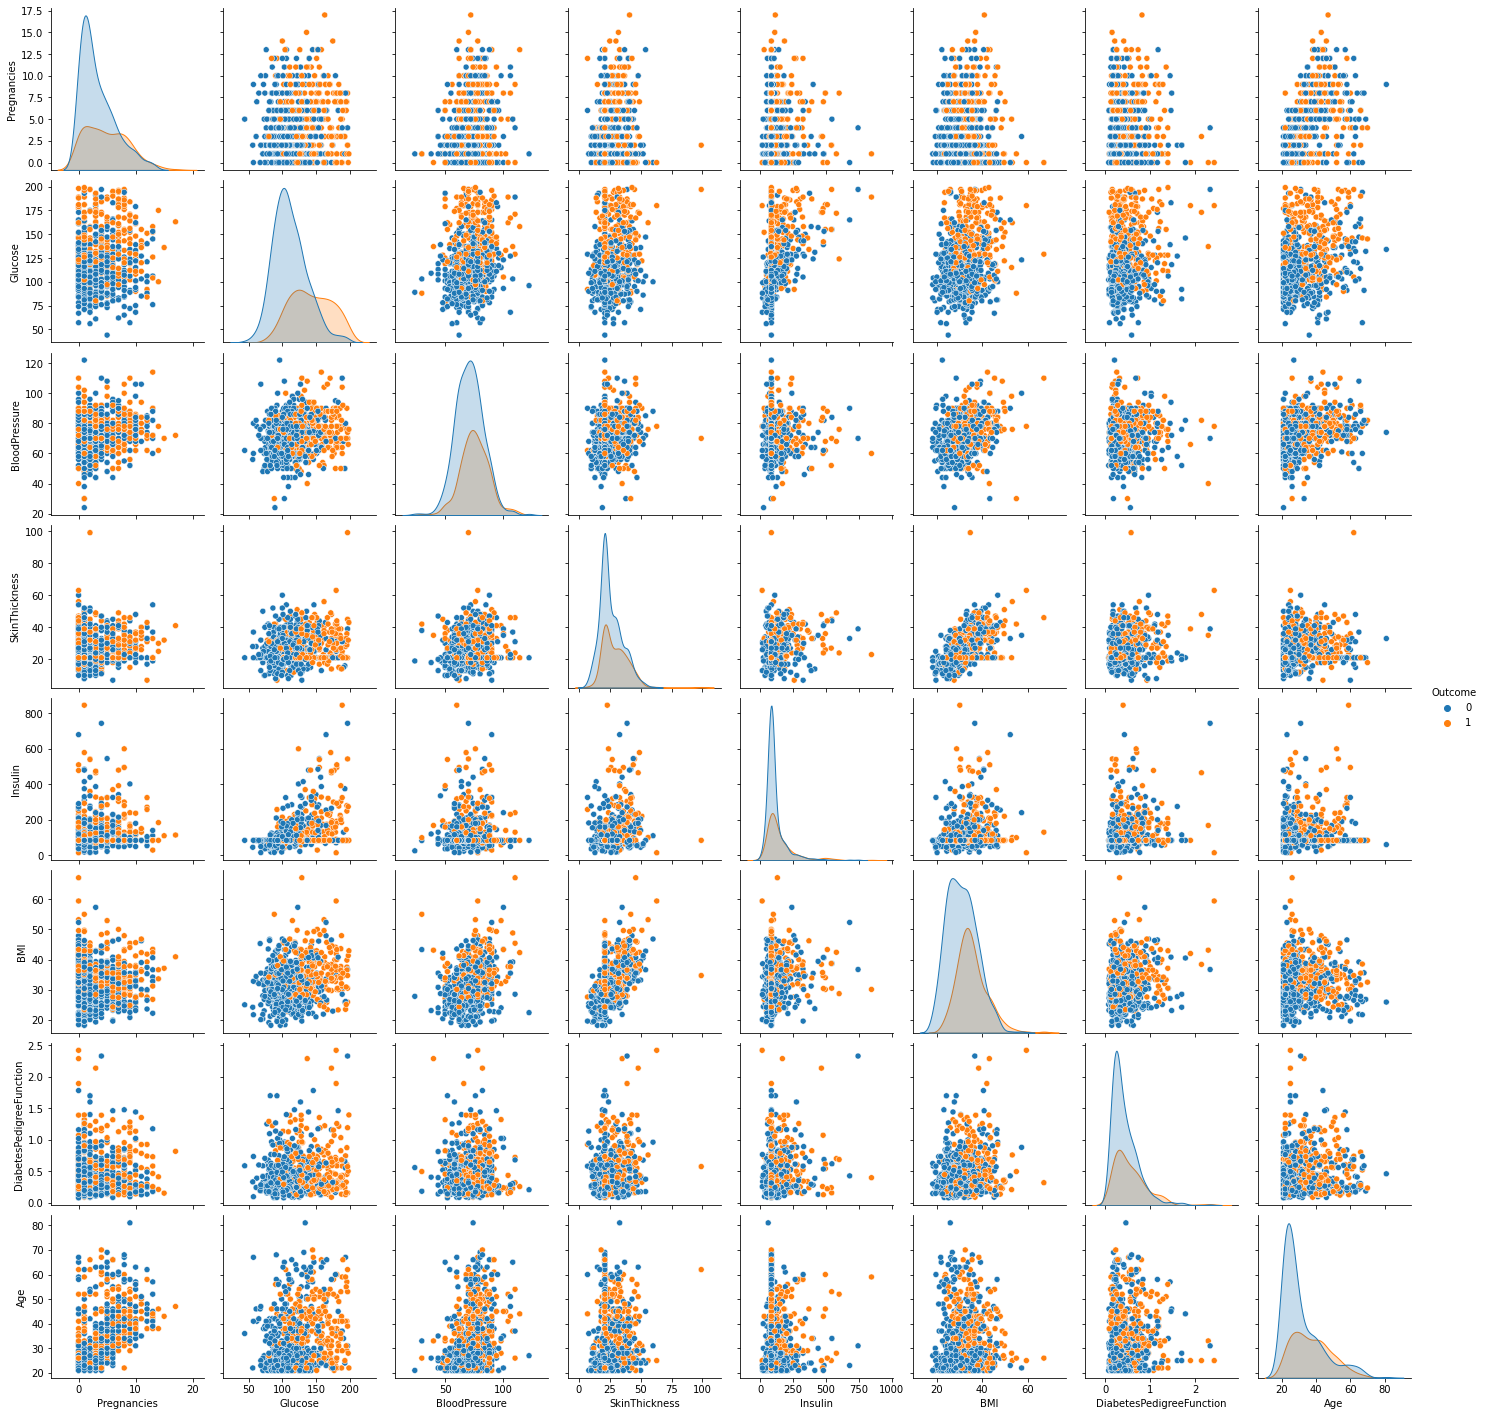

In [33]:
sns.pairplot(df,hue='Outcome')

We can see the datapoints are very messy overlaping.So we can't implement basic classifiers such as logistic regression as it will take more time.

### Balancing the data

In [34]:
df.Outcome.value_counts()

0    475
1    249
Name: Outcome, dtype: int64

The data needs to be balanced

In [35]:
from imblearn.over_sampling import RandomOverSampler
RandomOverSampler?

In [36]:
os = RandomOverSampler()

In [37]:
X,Y=os.fit_resample(df.drop('Outcome',axis=1),df.Outcome)

In [38]:
Y.value_counts()

1    475
0    475
Name: Outcome, dtype: int64

In [39]:
resampled_data=pd.DataFrame(X)

In [40]:
resampled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,84,33.6,0.627,50
1,1,85,66,29,84,26.6,0.351,31
2,8,183,64,21,84,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [41]:
resampled_data['Outcome']=Y

In [42]:
resampled_data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,84,33.6,0.627,50,1


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(resampled_data.drop('Outcome',axis=1),resampled_data.Outcome,test_size=0.20,stratify=Y)

In [45]:
xtrain.shape,xtest.shape

((760, 8), (190, 8))

In [46]:
#Scaling the data

scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

## Model Building

### RandomForestClassifier model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [49]:
rf_ypred=rf.predict(xtest)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
accuracy_score(rf_ypred,ytest)

0.8210526315789474

In [52]:
confusion_matrix(rf_ypred,ytest)

array([[71, 10],
       [24, 85]], dtype=int64)

In [53]:
print(classification_report(rf_ypred,ytest))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        81
           1       0.89      0.78      0.83       109

    accuracy                           0.82       190
   macro avg       0.82      0.83      0.82       190
weighted avg       0.83      0.82      0.82       190



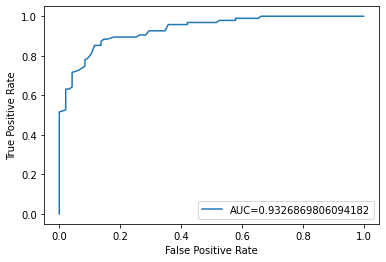

In [54]:
rf_y_pred_proba = rf.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  rf_y_pred_proba)
auc = metrics.roc_auc_score(ytest, rf_y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


We are getting 87% accuracy from RandomForestClassifier

# GradientBoostingClassifier model

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gb=GradientBoostingClassifier()

In [57]:
gb.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [58]:
gb_ypred = gb.predict(xtest)


In [59]:
accuracy_score(gb_ypred,ytest)

0.8105263157894737

In [60]:
confusion_matrix(gb_ypred,ytest)

array([[72, 13],
       [23, 82]], dtype=int64)

In [61]:
print(classification_report(gb_ypred,ytest))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        85
           1       0.86      0.78      0.82       105

    accuracy                           0.81       190
   macro avg       0.81      0.81      0.81       190
weighted avg       0.82      0.81      0.81       190



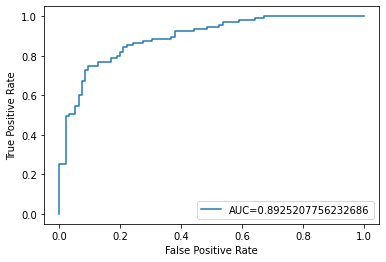

In [62]:
gb_y_pred_proba = gb.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  gb_y_pred_proba)
auc = metrics.roc_auc_score(ytest, gb_y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


We are getting 79% accuracy from GradientBoostingClassifier

# KNN model

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
#calculating accuracy for n_neighbors 1 to 40
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    accuracy_rate.append(np.mean(pred_i==ytest))

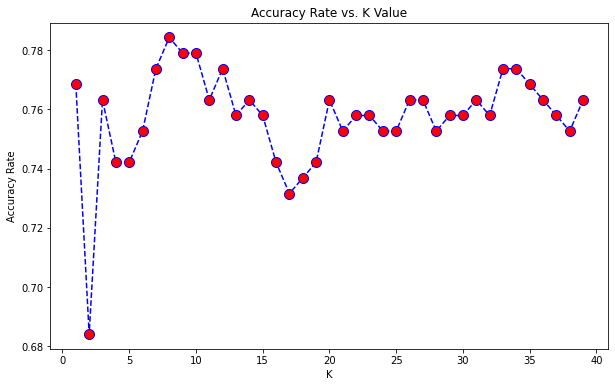

In [65]:
#plotting the accuracy with respect to k values 

plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [66]:
knn_1=KNeighborsClassifier(n_neighbors=1)

In [67]:
knn_1.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [68]:
knn1_ypred=knn.predict(xtest)

In [69]:
accuracy_score(knn1_ypred,ytest)

0.7631578947368421

We are getting 81% accuracy from knn model with n_neighbors=1, which is better than gradientboosting

In [70]:
confusion_matrix(knn1_ypred,ytest)

array([[68, 18],
       [27, 77]], dtype=int64)

In [71]:
print(classification_report(knn1_ypred,ytest))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        86
           1       0.81      0.74      0.77       104

    accuracy                           0.76       190
   macro avg       0.76      0.77      0.76       190
weighted avg       0.77      0.76      0.76       190



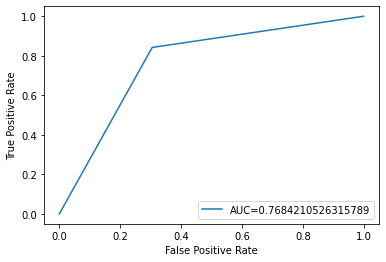

In [72]:
knn1_y_pred_proba = knn_1.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  knn1_y_pred_proba)
auc = metrics.roc_auc_score(ytest, knn1_y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


Now we will select n_neighbors=17 because it has the highest accuracy after 1. Selecting 1 can cause overfitting problems

In [73]:
knn17_model=KNeighborsClassifier(n_neighbors=17)

In [74]:
knn17_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=17)

In [75]:
knn17_ypred=knn17_model.predict(xtest)

In [76]:
accuracy_score(knn17_ypred,ytest)

0.7315789473684211

We are getting 77% accuracy from knn model with n_neighbors=17

In [77]:
confusion_matrix(knn17_ypred,ytest)

array([[63, 19],
       [32, 76]], dtype=int64)

In [78]:
print(classification_report(knn17_ypred,ytest))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71        82
           1       0.80      0.70      0.75       108

    accuracy                           0.73       190
   macro avg       0.73      0.74      0.73       190
weighted avg       0.74      0.73      0.73       190



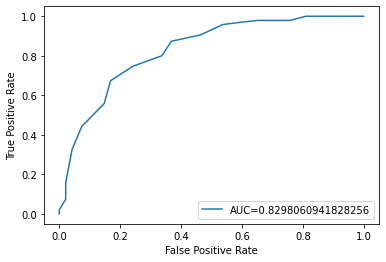

In [79]:
knn17_y_pred_proba = knn17_model.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  knn17_y_pred_proba)
auc = metrics.roc_auc_score(ytest, knn17_y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


### Conclusion: RandomforestClassifier gives the best accuracy then knn and at last GradientBoostingClassifier